<a href="https://colab.research.google.com/github/AlexKressner/Cookbook/blob/master/Decision_Tree_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Tree, Beispiel Immobilienpreise



## 1 Daten aus Goolge-Drive importieren

In [ ]:
import pandas as pd

In [ ]:
# Google-Drive einbinden
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/DHBW/BI/Daten/"

In [ ]:
# Datentypen für das Laden der Daten definieren
# Beispiel: Zwar handelt es sich beim Baujahr um eine Zahl, allerdings interessiert uns
# hier nur, ob eine Immobilie in einem Jahr gebaut wurde oder eben nicht. 
dtypes = {
    "Verkaufsmonat": "str",
    "Baujahr": "str",
}

In [ ]:
# Relevante Spalten definiere
cols = [
    "Verkaufspreis","Verkaufsmonat","Wohnraum_qm",
    "Keller_qm", "Grundstueck_qm","Baujahr"
    ]

In [ ]:
# Daten laden
data = pd.read_csv(f"{path}house_price.txt", dtype=dtypes, usecols=cols)

In [ ]:
data.head()

,Verkaufspreis,Verkaufsmonat,Wohnraum_qm,Keller_qm,Grundstueck_qm,Baujahr
0,208500,2,521.341463,260.975610,2576.219512,2003
1,181500,5,384.756098,384.756098,2926.829268,1976
2,223500,9,544.512195,280.487805,3429.878049,2001
3,140000,2,523.475610,230.487805,2911.585366,1915
4,250000,12,670.121951,349.085366,4347.560976,2000


## 2 Erster Überblick zum Datensatz

In [ ]:
# Kopfzeile der Daten
data.head()

,Verkaufspreis,Verkaufsmonat,Wohnraum_qm,Keller_qm,Grundstueck_qm,Baujahr
0,208500,2,521.341463,260.975610,2576.219512,2003
1,181500,5,384.756098,384.756098,2926.829268,1976
2,223500,9,544.512195,280.487805,3429.878049,2001
3,140000,2,523.475610,230.487805,2911.585366,1915
4,250000,12,670.121951,349.085366,4347.560976,2000


In [ ]:
# Größe des Datensatzes
data.shape

(1460, 6)

## 3 Prognose mit einem Entscheidungsbaum

In [ ]:
# Features, d.h. womit lässt sich der Immobilienpreis vorhersagen!
X = data.drop(columns="Verkaufspreis")

In [ ]:
# Target, d.h. was soll prognostiziert werden!
y = data["Verkaufspreis"]

In [ ]:
# Kategoriale Features umcodieren
X = pd.get_dummies(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Training Algorithmus: X_train (Features), y_train (Target)
# Test des Algorithmus (Bewertung): X_test, y_test
#     1) Algorithmus bekommt Daten (X_test), die er noch nicht kennt & macht Prognose
#     2) Vergleich Prognose mit tatsächlichen Werte (y_test) --> Bewertung

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decision_tree = DecisionTreeRegressor(max_depth=3)

In [ ]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mean_absolute_percentage_error(y_train, decision_tree.predict(X_train)) * 100

21.323384183756566

In [ ]:
mean_absolute_percentage_error(y_test, decision_tree.predict(X_test)) * 100

23.39020363066787

## 4 Visualisierung des Entscheidungsbaums

In [ ]:
from sklearn import tree

[Text(0.5, 0.875, 'X[0] <= 452.134\nsquared_error = 6646809839.119\nsamples = 1168\nvalue = 181589.279'),
 Text(0.25, 0.625, 'X[1] <= 355.03\nsquared_error = 1352712321.937\nsamples = 614\nvalue = 136361.438'),
 Text(0.125, 0.375, 'X[0] <= 319.817\nsquared_error = 898922687.609\nsamples = 485\nvalue = 125767.21'),
 Text(0.0625, 0.125, 'squared_error = 712207465.295\nsamples = 227\nvalue = 113092.718'),
 Text(0.1875, 0.125, 'squared_error = 797504499.665\nsamples = 258\nvalue = 136918.798'),
 Text(0.375, 0.375, 'X[1] <= 441.311\nsquared_error = 1050332350.387\nsamples = 129\nvalue = 176192.45'),
 Text(0.3125, 0.125, 'squared_error = 917692609.325\nsamples = 118\nvalue = 172862.746'),
 Text(0.4375, 0.125, 'squared_error = 1078441193.719\nsamples = 11\nvalue = 211911.091'),
 Text(0.75, 0.625, 'X[1] <= 515.701\nsquared_error = 7734544952.582\nsamples = 554\nvalue = 231715.442'),
 Text(0.625, 0.375, 'X[0] <= 727.439\nsquared_error = 3970242438.032\nsamples = 474\nvalue = 212895.259'),
 Text

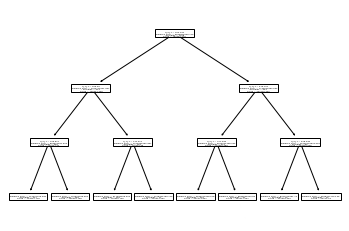

In [ ]:
# Variante 1
tree.plot_tree(decision_tree)

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
# Variante 2
# 1. Schritt: Exportieren des Entscheidungsbaums in eine .dot Datei
export_graphviz(
    decision_tree,
    out_file="/content/drive/MyDrive/DHBW/BI/tree.dot",
    feature_names=decision_tree.feature_names_in_,
    rounded=True,
    filled=True
)

In [ ]:
# 2. Schritt: Umwandeln der .dot in eine .png Datei
! dot -Tpng /content/drive/MyDrive/DHBW/BI/tree.dot -o /content/drive/MyDrive/DHBW/BI/tree.png

# 5 Bestimmung optimaler Parameter für den Entscheidungsbaum

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Grid definieren
param_grid = {
    "max_depth": [3, 4, 5, 6, 7] # Tiefe des Baums
}

In [ ]:
decision_tree = DecisionTreeRegressor()

In [ ]:
grid = GridSearchCV(
    decision_tree, # verwendetes Modell
    param_grid, # zu untersuchende Parameter
    cv=10, # Anzahl der Folds
    n_jobs=-1, # Parallelisierung der Ausführung
    scoring="neg_mean_squared_error", # Fehlermaß
)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search_results = pd.DataFrame(grid.cv_results_)[
    ["mean_test_score", "std_test_score", "params"]
]
grid_search_results

,mean_test_score,std_test_score,params
0,-2.934639e+09,9.545002e+08,{'max_depth': 3}
1,-2.811271e+09,1.211715e+09,{'max_depth': 4}
2,-2.892039e+09,1.345156e+09,{'max_depth': 5}
3,-2.755803e+09,1.381649e+09,{'max_depth': 6}
4,-2.578039e+09,1.126796e+09,{'max_depth': 7}


In [ ]:
# Auswahl des besten Modells
best_model = grid.best_estimator_

In [ ]:
best_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
mean_absolute_percentage_error(y_train, best_model.predict(X_train)) * 100

12.665006089204079

In [ ]:
mean_absolute_percentage_error(y_test, best_model.predict(X_test)) * 100

18.689304946576762

In [ ]:
# 1. Schritt: Exportieren des Entscheidungsbaums in eine .dot Datei
export_graphviz(
    best_model,
    out_file="/content/drive/MyDrive/DHBW/BI/best_tree.dot",
    feature_names=best_model.feature_names_in_,
    rounded=True,
    filled=True
)

In [ ]:
# 2. Schritt: Umwandeln der .dot in eine .png Datei
! dot -Tpng /content/drive/MyDrive/DHBW/BI/best_tree.dot -o /content/drive/MyDrive/DHBW/BI/best_tree.png

# Random Forest Regressor, Beispiel Immobilienpreise

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor()

In [ ]:
# Grid definieren
param_grid = {
    "max_depth": [6, 7, 9], # maximale Tiefe des Baums
    "n_estimators": [50, 150, 250] # Anzahl der Entscheidungsbäume
}

In [ ]:
grid = GridSearchCV(
    forest, # verwendetes Modell
    param_grid, # zu untersuchende Parameter
    cv=10, # Anzahl der Folds
    n_jobs=-1, # Parallelisierung der Ausführung
    scoring="neg_mean_squared_error", # Fehlermaß
)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 9, 12],
                         'n_estimators': [50, 150, 250]},
             scoring='neg_mean_squared_error')

In [ ]:
best_model = grid.best_estimator_
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 12,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
mean_absolute_percentage_error(y_train, best_model.predict(X_train)) * 100

8.361574915196258

In [ ]:
mean_absolute_percentage_error(y_test, best_model.predict(X_test)) * 100

18.674757308018673